In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math 
import matplotlib.patches as mpatches

In [81]:
df = pd.read_json("dataV3.json")
df.shape

(7560, 29)

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Ano de Edição        3466 non-null   float64
 1   Colaborador          5077 non-null   object 
 2   Editora              5051 non-null   object 
 3   ISBN                 7228 non-null   object 
 4   Ano                  4997 non-null   float64
 5   Edição               4871 non-null   float64
 6   Origem               5075 non-null   object 
 7   Formato              5036 non-null   object 
 8   Encadernação         7196 non-null   object 
 9   Idioma               6291 non-null   object 
 10  País                 4974 non-null   object 
 11  Páginas              7053 non-null   float64
 12  Assunto              349 non-null    object 
 13  preço                7560 non-null   float64
 14  nome                 7560 non-null   object 
 15  categoria            7560 non-null   o

# Remove campos incomuns aos registros

In [83]:
campos_desnecessarios = ['Assunto','Idade','Tipo de Colaborador','EAN','Sinopse','Altura','Largura','Peso','Subtitulo','Grau./Nível','Série/Ano','Cor','Coleção']
df = df.drop(campos_desnecessarios,axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Ano de Edição  3466 non-null   float64
 1   Colaborador    5077 non-null   object 
 2   Editora        5051 non-null   object 
 3   ISBN           7228 non-null   object 
 4   Ano            4997 non-null   float64
 5   Edição         4871 non-null   float64
 6   Origem         5075 non-null   object 
 7   Formato        5036 non-null   object 
 8   Encadernação   7196 non-null   object 
 9   Idioma         6291 non-null   object 
 10  País           4974 non-null   object 
 11  Páginas        7053 non-null   float64
 12  preço          7560 non-null   float64
 13  nome           7560 non-null   object 
 14  categoria      7560 non-null   object 
 15  Complemento    1494 non-null   object 
dtypes: float64(5), object(11)
memory usage: 945.1+ KB


## Será que o campo complemento impácta no preço?

In [84]:
df['Complemento'].value_counts()

NENHUM               1460
CD-AUDIO               17
LIVRO                   9
CD-ROM                  4
DVD-ROM                 2
BRINDE                  1
CARTÕES DE ACESSO       1
Name: Complemento, dtype: int64

<AxesSubplot:xlabel='Complemento', ylabel='preço'>

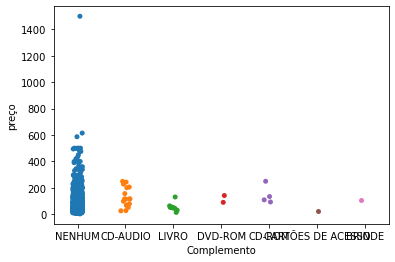

In [85]:
sns.stripplot(x="Complemento", y="preço", data=df)

### Complemento parece não importar muito para o preço

In [86]:
df = df.drop("Complemento",axis=1)

In [87]:
df.nunique()

Ano de Edição      45
Colaborador      4373
Editora           758
ISBN             7190
Ano                46
Edição             61
Origem              3
Formato             8
Encadernação       13
Idioma             11
País               11
Páginas           670
preço            1830
nome             7455
categoria          41
dtype: int64

# Verificando valores nulos para os campos

## Qual o percentual de nulos para cada campo?

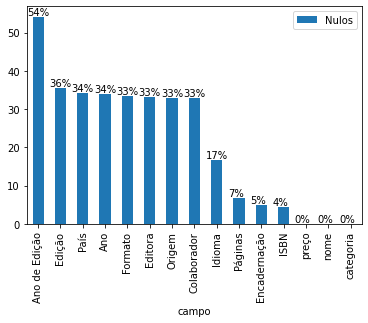

In [88]:
k = int(1 + 3.3 * math.log10(df.shape[0]))
total = df.shape[0]
data = pd.DataFrame({},columns=["campo","Não nulos","Nulos"])
for i,campo in enumerate(df) :
    qtd_null = df[df[campo].isna()].shape[0]
    row = [campo,100,(qtd_null*100)/total]
    data.loc[i] = row

data = data.sort_values(by="Nulos",ascending=False)

g = data.plot.bar(x='campo',y='Nulos')
for index,value in enumerate(data['Nulos']):
    plt.text(index-0.5,value+0.5,f"{value:.0f}%")
plt.show()

## Tratando nulos para edição

In [89]:
df['Edição'].value_counts()

1.0       4442
2.0         94
3.0         28
2020.0      20
4.0         19
          ... 
2005.0       1
57.0         1
39.0         1
34.0         1
55.0         1
Name: Edição, Length: 61, dtype: int64

### A esmagadora maiora parece ser 1 (primeira edição), então parece ser razoável que um livro de edição desconhecida seja sua primeira edição

In [90]:
df['Edição'] = df['Edição'].fillna(1).astype(int)
df['Edição'].value_counts()

1       7131
2         94
3         28
2020      20
4         19
        ... 
55         1
2002       1
62         1
26         1
1999       1
Name: Edição, Length: 61, dtype: int64

## Parecem haver muitras editoras, quais são as principais:

In [91]:
top10_editoras = df['Editora'].value_counts()[0:10]
top10_editoras

COMPANHIA DAS LETRAS    167
MADRAS                  142
SEXTANTE                115
ALTA BOOKS -            102
VOZES                   100
CONTEXTO                 99
SARAIVA EDITORA -        91
ROCCO -                  90
RECORD                   69
INTRINSECA               68
Name: Editora, dtype: int64

In [92]:
total_editoras = df[df['Editora'].isna()].shape[0]
print(f"{(total_editoras*100)/df.shape[0]:.2f}% ({total_editoras}/{df.shape[0]}) são não nulas")

33.19% (2509/7560) são não nulas


In [93]:
qtd = len(df[df["Editora"].isin(list(top10_editoras.keys()))])
percentual = ((qtd * 100) / total_editoras)
print(f"As principais editoras publicaram {percentual:.2f}%({qtd}/{total_editoras})")

As principais editoras publicaram 41.57%(1043/2509)


In [94]:
df['Editora'] = df['Editora'].fillna("Outra")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Ano de Edição  3466 non-null   float64
 1   Colaborador    5077 non-null   object 
 2   Editora        7560 non-null   object 
 3   ISBN           7228 non-null   object 
 4   Ano            4997 non-null   float64
 5   Edição         7560 non-null   int64  
 6   Origem         5075 non-null   object 
 7   Formato        5036 non-null   object 
 8   Encadernação   7196 non-null   object 
 9   Idioma         6291 non-null   object 
 10  País           4974 non-null   object 
 11  Páginas        7053 non-null   float64
 12  preço          7560 non-null   float64
 13  nome           7560 non-null   object 
 14  categoria      7560 non-null   object 
dtypes: float64(4), int64(1), object(10)
memory usage: 886.1+ KB


In [95]:
df.describe()

,Ano de Edição,Ano,Edição,Páginas,preço
count,3466.000000,4997.000000,7560.000000,7053.000000,7560.000000
mean,2015.345355,2014.425455,52.323280,284.348788,69.381878
std,6.349549,6.400459,316.625834,254.356544,74.818648
min,1966.000000,1966.000000,1.000000,1.000000,1.550000
25%,2013.000000,2012.000000,1.000000,144.000000,34.900000
50%,2017.000000,2016.000000,1.000000,224.000000,49.900000
75%,2020.000000,2019.000000,1.000000,336.000000,76.930000
max,2021.000000,2021.000000,2021.000000,4696.000000,1551.000000


In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Ano de Edição  3466 non-null   float64
 1   Colaborador    5077 non-null   object 
 2   Editora        7560 non-null   object 
 3   ISBN           7228 non-null   object 
 4   Ano            4997 non-null   float64
 5   Edição         7560 non-null   int64  
 6   Origem         5075 non-null   object 
 7   Formato        5036 non-null   object 
 8   Encadernação   7196 non-null   object 
 9   Idioma         6291 non-null   object 
 10  País           4974 non-null   object 
 11  Páginas        7053 non-null   float64
 12  preço          7560 non-null   float64
 13  nome           7560 non-null   object 
 14  categoria      7560 non-null   object 
dtypes: float64(4), int64(1), object(10)
memory usage: 886.1+ KB


<AxesSubplot:xlabel='Ano de Edição', ylabel='preço'>

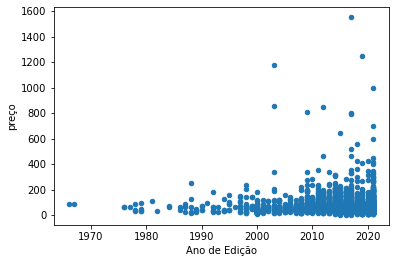

In [97]:
df.plot.scatter("Ano de Edição","preço")

<AxesSubplot:>

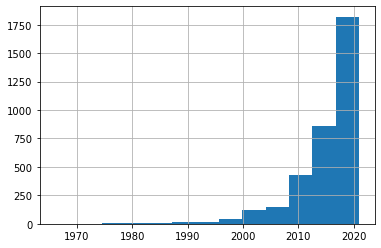

In [98]:
df["Ano de Edição"].hist(bins=k)

## Ano de edição parece ser relevante para o preço. Qual a melhor alternativa para tratar anos nulos?

### Setando para valores 0

<AxesSubplot:xlabel='Ano de Edição', ylabel='preço'>

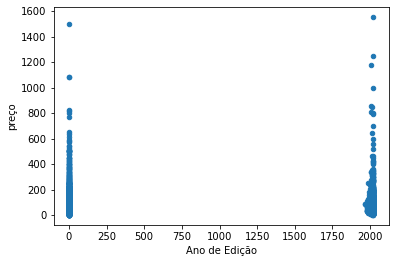

In [99]:
df1 = df.copy()
df1["Ano de Edição"] = df1["Ano de Edição"].fillna(0)
df1.plot.scatter("Ano de Edição","preço")

<AxesSubplot:>

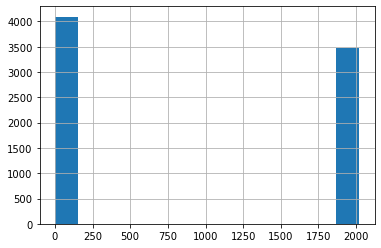

In [100]:
df1["Ano de Edição"].hist(bins=k)

### Setando para média

Ano médio 2015


<AxesSubplot:xlabel='Ano de Edição', ylabel='preço'>

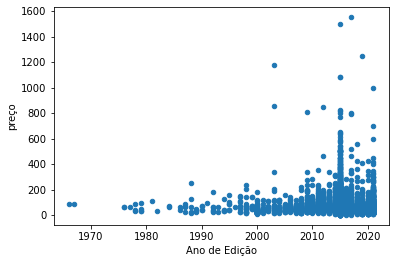

In [101]:
df2 = df.copy()
df2["Ano de Edição"] = df2["Ano de Edição"].fillna(int(df2["Ano de Edição"].mean()))
print(f"Ano médio {df2['Ano de Edição'].mean():.0f}")
df2.plot.scatter("Ano de Edição","preço")

<AxesSubplot:>

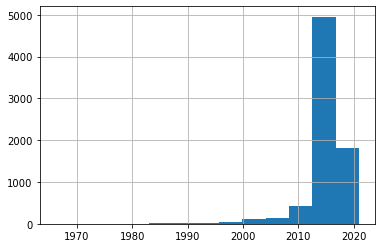

In [102]:
df2["Ano de Edição"].hist(bins=k)

### E se tentar usar o ano médio da editora?

<AxesSubplot:xlabel='Ano de Edição', ylabel='preço'>

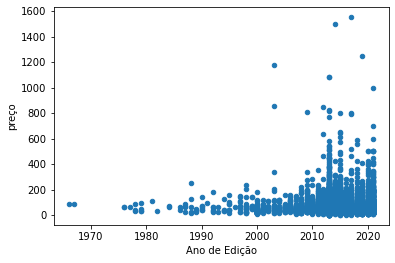

In [103]:
df3 = df.copy()
ano_edicao_media_editora = df3.groupby(by="Editora")["Ano de Edição"].mean()
media = int(df3["Ano de Edição"].mean())
ano_edicao_media_editora = ano_edicao_media_editora.fillna(media)
ano_edicao_media_editora = ano_edicao_media_editora.astype(int)
for index,row in df3.iterrows():
    if np.isnan(df3.loc[index,"Ano de Edição"]):
        if df3.loc[index,"Editora"] in ano_edicao_media_editora:
            #print(f"1-Vai trocar {df3.loc[index,'Ano de Edição']} por {ano_edicao_media_editora[df3.loc[index,'Editora']]}")
            df3.loc[index,"Ano de Edição"] = ano_edicao_media_editora[df3.loc[index,"Editora"]]
        else:
            #print(f"2-Vai trocar {df3.loc[index,'Ano de Edição']} por {media}")
            df3.loc[index,"Ano de Edição"] = media
df3.plot.scatter("Ano de Edição","preço")

<AxesSubplot:>

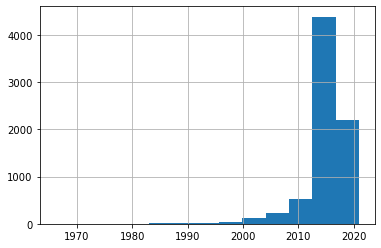

In [104]:
df3["Ano de Edição"].hist(bins=k)

## Utilizar a média por editora parece se aproximar mais do original


In [105]:
df = df3

# Quais são os extremos?

In [106]:
df[df["preço"] == df["preço"].min()]

,Ano de Edição,Colaborador,Editora,ISBN,Ano,Edição,Origem,Formato,Encadernação,Idioma,País,Páginas,preço,nome,categoria
2262,2015.0,"Autor:WHITE, ELLEN G.",CPB -,8534514089,2013.0,1,Usado,LIVRO DIDÁTICO,BROCHURA,NaN,BRASIL,106.0,1.55,"GRANDE ESPERANÇA, A",Didáticos


In [107]:
df[df["preço"] == df["preço"].max()]

,Ano de Edição,Colaborador,Editora,ISBN,Ano,Edição,Origem,Formato,Encadernação,Idioma,País,Páginas,preço,nome,categoria
3739,2017.0,"Autor:LEITE, CLAUDIA DA COSTA|Autor:ROCHA, MAN...",MANOLE,8520451446,2017.0,1,Nacional,LIVRO,CAPA DURA,PORTUGUÊS,BRASIL,3586.0,1551.0,TRATADO DE RADIOLOGIA (KIT),Medicina


# Verificando nova proporção de nulos

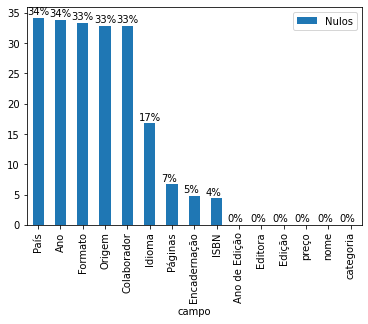

In [108]:
total = df.shape[0]
data = pd.DataFrame({},columns=["campo","Não nulos","Nulos"])
for i,campo in enumerate(df) :
    qtd_null = df[df[campo].isna()].shape[0]
    row = [campo,100,(qtd_null*100)/total]
    data.loc[i] = row

data = data.sort_values(by="Nulos",ascending=False)

g = data.plot.bar(x='campo',y='Nulos')
for index,value in enumerate(data['Nulos']):
    plt.text(index-0.5,value+0.5,f"{value:.0f}%")
plt.show()